In [ ]:
!pip install trax

In [64]:
!pip install wordcloud
!pip install Pillow==9.5.0
!pip install --upgrade pip
!pip install textblob


DEPRECATION: arcgis 1.9.1 has a non-standard dependency specifier keyring<=21.8.*,>=19. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: celery 5.1.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

In [65]:
!pip install nltk

DEPRECATION: arcgis 1.9.1 has a non-standard dependency specifier keyring<=21.8.*,>=19. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: celery 5.1.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

In [ ]:
!python --version

In [ ]:
!pip install mlxtend

### 1. Installing all libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
#import trax
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import plotly.express as px
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_learning_curves
from sklearn.preprocessing import LabelEncoder


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer, SnowballStemmer

In [69]:
from xgboost import XGBClassifier

### 2. Importing CSV data

In [70]:
df_test = pd.read_csv("drugsComTest_raw.csv")
df_train = pd.read_csv("drugsComTrain_raw.csv")

print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

df_train.head()



The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


### 3. Data Preprocessing

In [71]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,05-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [72]:

data=pd.concat([df_train,df_test])
data.shape

(215063, 7)

In [73]:
data.sample(100)

,uniqueID,drugName,condition,review,rating,date,usefulCount
139013,129219,Levonorgestrel,Birth Control,"""I just got skyla put in a few hours ago. I ca...",10,5-Oct-15,9
89744,129555,Levonorgestrel,Birth Control,"""Insertion of skyla was simple, though a littl...",9,27-Jul-15,1
22553,87767,Naproxen,Headache,"""I have TMJ and it was causing severe headache...",10,08-Mar-08,44
2040,38826,Esomeprazole,GERD,"""I have tried everything to ease the pain and ...",10,10-Jan-09,16
26000,187208,Azelastine / fluticasone,Allergic Rhinitis,"""My doctor prescribed this instead of the Flon...",2,17-Nov-16,7
...,...,...,...,...,...,...,...
27204,21240,Focalin XR,ADHD,"""I am a 60 year old male with ADHD, who would ...",9,28-Dec-12,61
154625,184256,Hydroxyzine,Anxiety,"""I have bad anxiety, did not work at all for m...",1,1-Jan-16,39
45961,16288,Ethinyl estradiol / norethindrone,Birth Control,"""I started taking this birth control pill as m...",10,20-Apr-16,7
7660,171678,Wellbutrin,Depression,"""I have been taking Wellbutrin for 16 months n...",10,30-Nov-09,55


In [74]:
data.describe

<bound method NDFrame.describe of        uniqueID                  drugName                     condition  \
0        206461                 Valsartan  Left Ventricular Dysfunction   
1         95260                Guanfacine                          ADHD   
2         92703                    Lybrel                 Birth Control   
3        138000                Ortho Evra                 Birth Control   
4         35696  Buprenorphine / naloxone             Opiate Dependence   
...         ...                       ...                           ...   
53761    159999                 Tamoxifen     Breast Cancer, Prevention   
53762    140714              Escitalopram                       Anxiety   
53763    130945            Levonorgestrel                 Birth Control   
53764     47656                Tapentadol                          Pain   
53765    113712                 Arthrotec                      Sciatica   

                                                  review  rating 

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [76]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [77]:
#Null Value
print ("Null values in the dataset : ", data.isnull().sum(axis = 0))

Null values in the dataset :  uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


In [78]:
# Calculating what percentage of data is null
size = data.shape[0]

print ("Total Size of the dataset : ", size)

total_na = data.isnull().sum(axis = 0)['condition']
print ("Null values : ", total_na)

print ("PERCENTAGE : ", (total_na/size)*100)

Total Size of the dataset :  215063
Null values :  1194
PERCENTAGE :  0.5551861547546533


In [79]:
data = data.dropna(how = 'any', axis = 0)

print ("The shape of the dataset after null values removal :", data.shape)

The shape of the dataset after null values removal : (213869, 7)


In [80]:
data.columns = data.columns.str.lower()

In [81]:
data.sort_values(['uniqueid'], ascending = True, inplace = True)
data.reset_index(drop = True, inplace = True)
data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [82]:
print (data['condition'].nunique(), "\n")

916 



In [83]:
print ("some of the conditions are : ", data['condition'].unique()[0:10])

some of the conditions are :  ['Abnormal Uterine Bleeding' 'Amenorrhea' 'Birth Control' 'Endometriosis'
 'Endometrial Hyperplasia, Prophylaxis' 'Renal Cell Carcinoma'
 'Not Listed / Othe' 'Eye Redness' 'Benign Prostatic Hyperplasia' 'Acne']


In [84]:
data.loc[data['rating'] == 1, :]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

In [85]:
data.loc[data.usefulcount == 0, 'drugname'].value_counts()


Etonogestrel                         590
Levonorgestrel                       473
Ethinyl estradiol / norethindrone    371
Implanon                             327
Ethinyl estradiol / norgestimate     252
                                    ... 
Insulin degludec                       1
Lidocaine / menthol                    1
Excedrin Quick Tab                     1
Acuvail                                1
Versed                                 1
Name: drugname, Length: 1487, dtype: int64

In [86]:
data['rating'].min()

1

In [87]:
data['date'] = pd.to_datetime(data['date'])

### 4. Exploratory Data Analysis

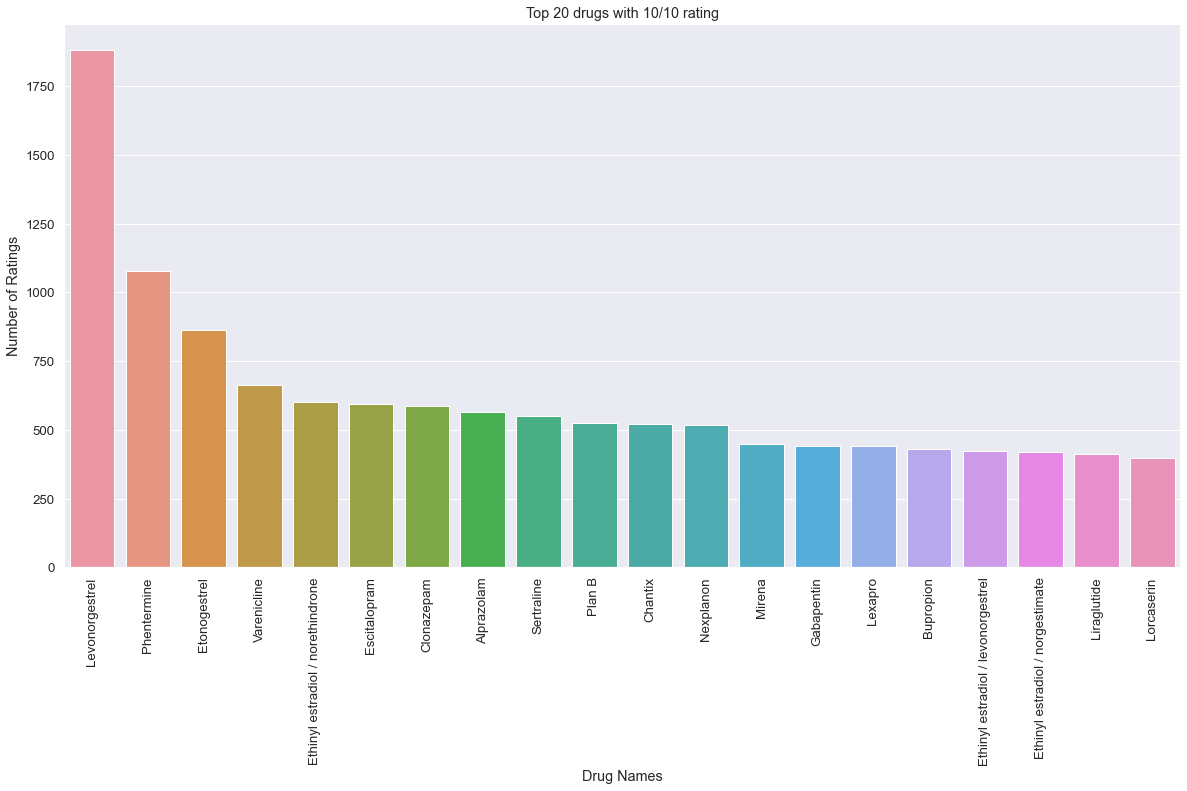

In [88]:

#This barplot shows the top 20 drugs with the 10/10 rating
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [20, 10]

rating = dict(data.loc[data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set(title = 'Top 20 drugs with 10/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);


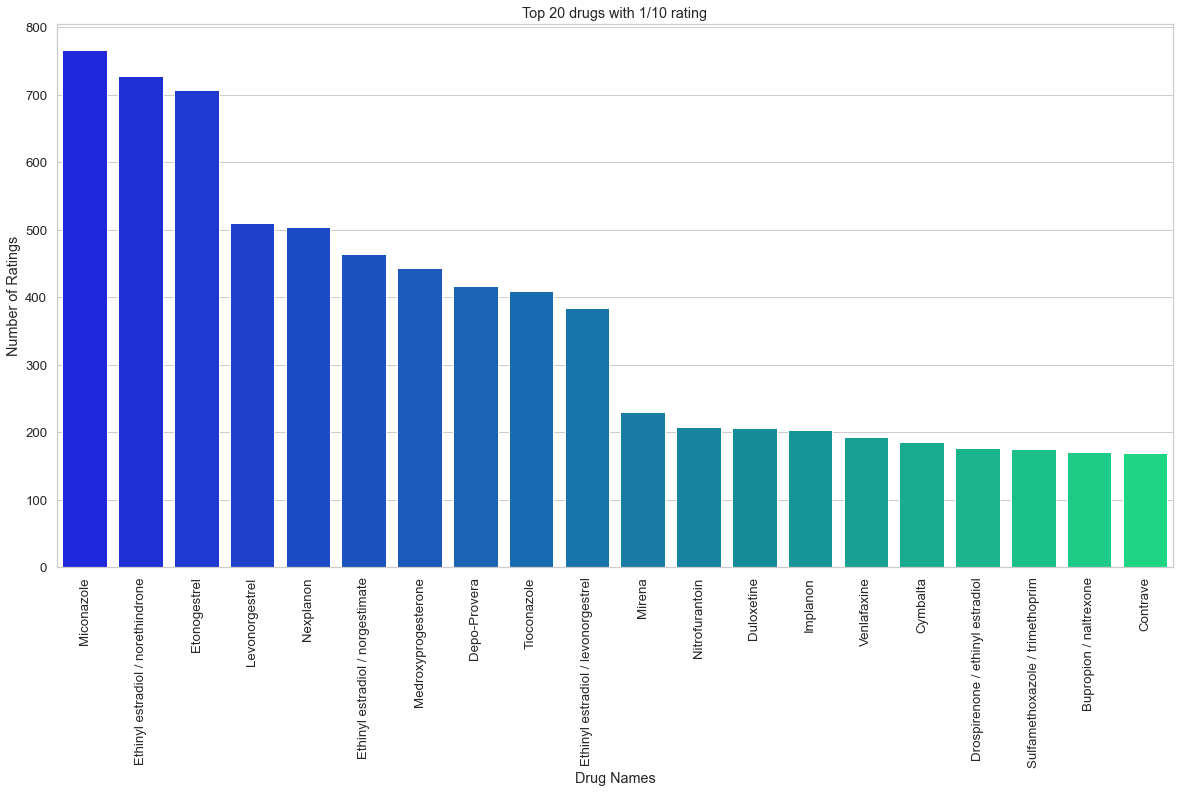

In [89]:
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [20, 10]

rating = dict(data.loc[data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set(title = 'Top 20 drugs with 1/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

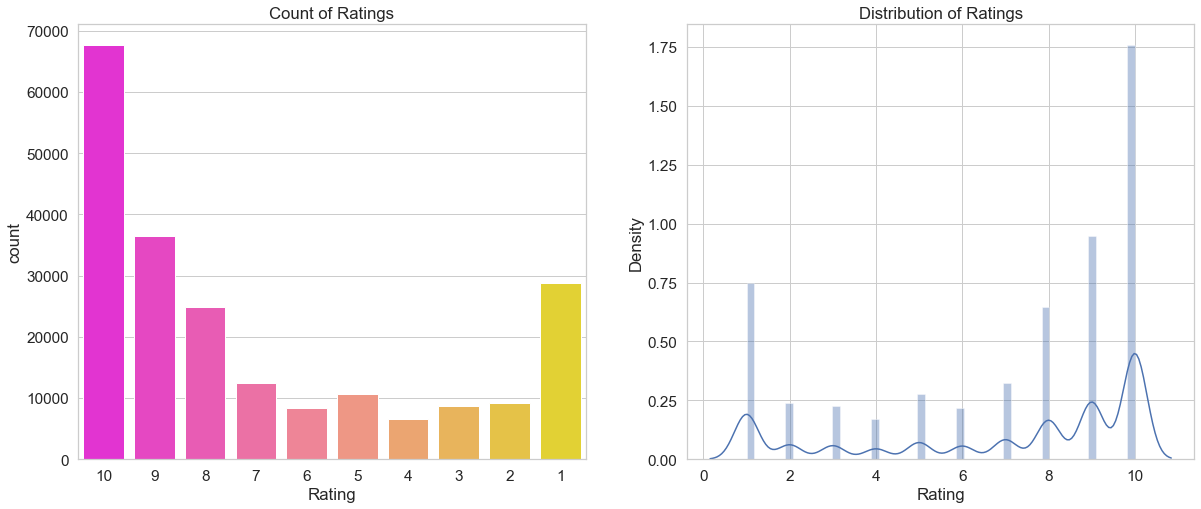

In [90]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating");

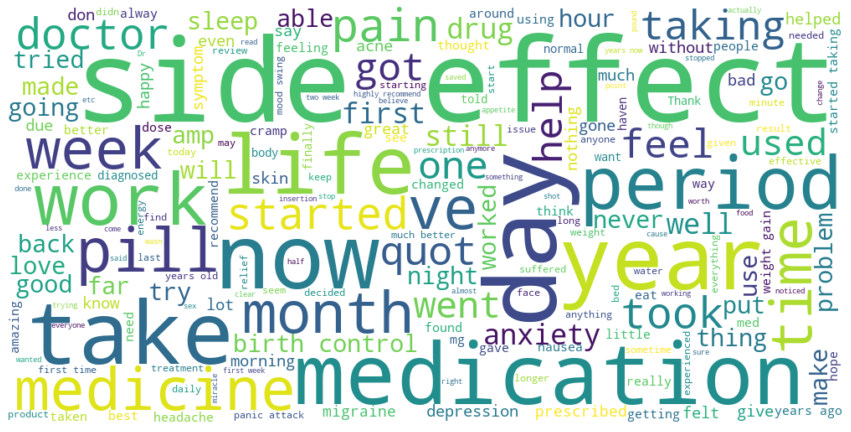

In [91]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = data.loc[data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

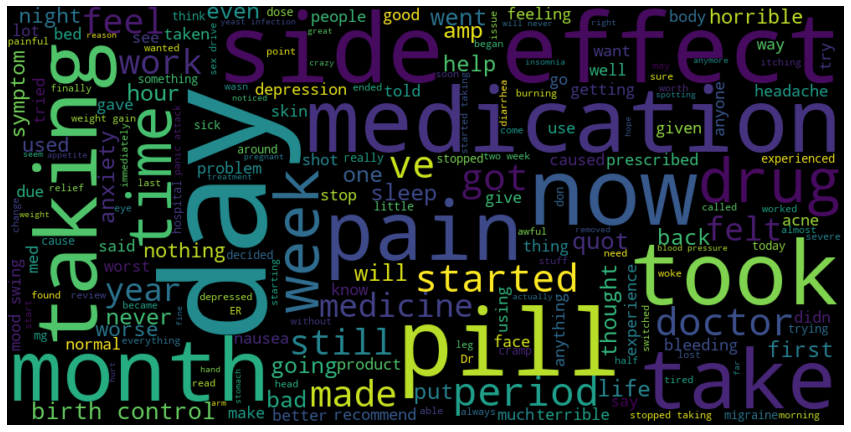

In [92]:
# Word cloud of the reviews with rating equal to 1

df_rate_one = data.loc[data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

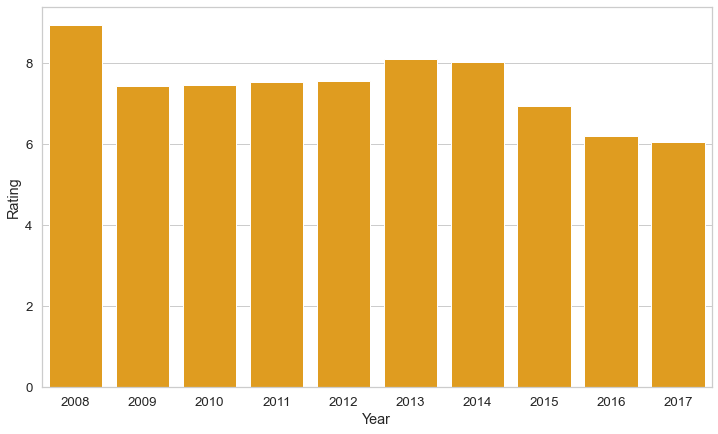

In [93]:
# This barplot shows the mean rating of the drugs per year

mean_rating = dict(data.groupby(data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'orange');
sns_.set_xlabel("Year")
sns_.set_ylabel("Rating");

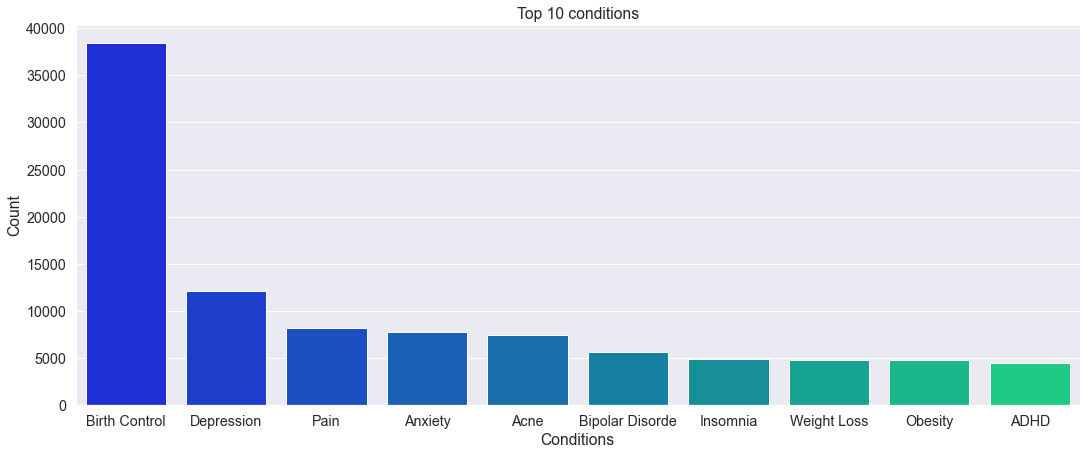

In [94]:
# This barplot show the top 10 conditions the people are suffering.

cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

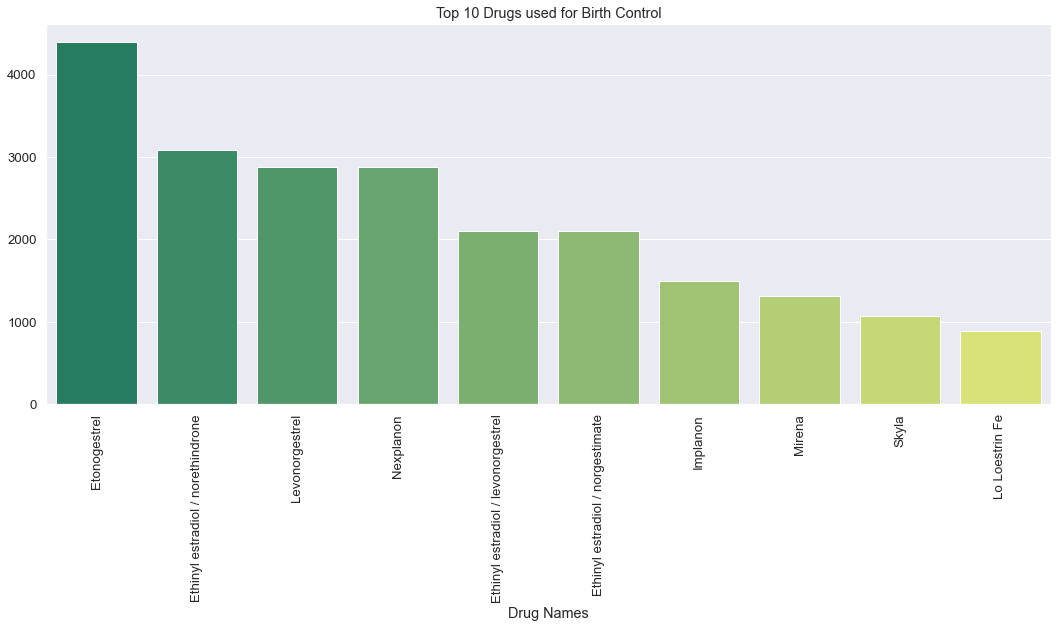

In [95]:
# Top 10 drugs which are used for the top condition, that is Birth Control

df = data[data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<Axes: xlabel='usefulcount', ylabel='Density'>

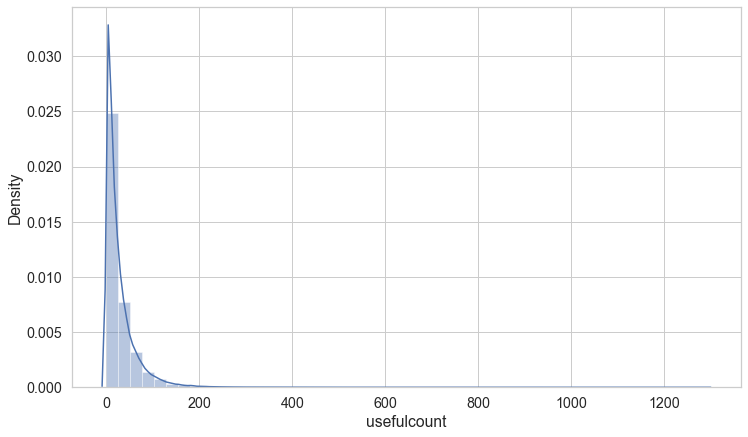

In [96]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(data['usefulcount'].dropna())

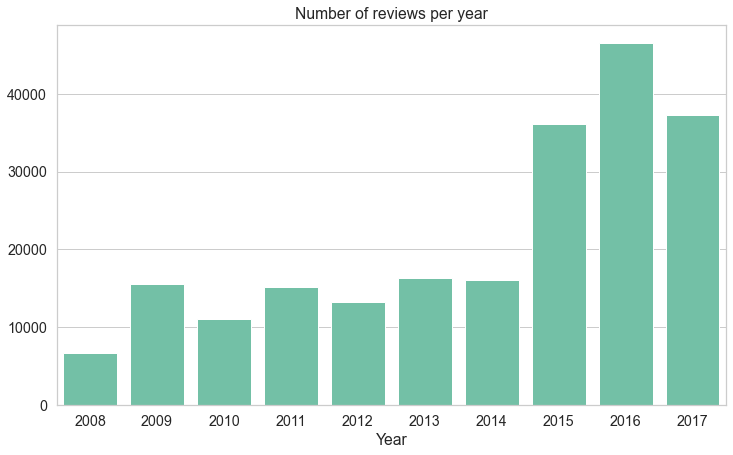

In [97]:
# This barplot shows the number of reviews per year
df = data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

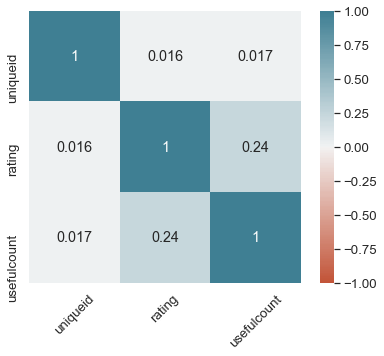

In [98]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

### Labels Preprocessing

In [99]:
def plot_bar_chart(df):
    # analyze the condition labels
    counts_series = df.condition.value_counts()
    counts_df = pd.DataFrame(counts_series)
    counts_df.reset_index(level=0, inplace=True)

    number_of_classes(df)

    fig = px.bar(counts_df, x="index", y="condition", orientation='v',
              height=400,
              title='xc')
    fig.show()

def number_of_classes(df):
    print("Number of classes: ", len(df["condition"].unique()))

### 4.Class Distribution (Here class is conditions and that particular condition have more than 20 reviews)

In [100]:
# Keeping classes which have more than 20 values in them
index_counts = df_train["condition"].value_counts()[df_train.condition.value_counts() >= 20].index
df_train = df_train[df_train["condition"].isin(index_counts)]

number_of_classes(df_train)

Number of classes:  330


In [101]:
plot_bar_chart(df_train)

Number of classes:  330


### 5. Undersampling classes with more than 200 samples ((only 200 reviews))

In [102]:
# undersampling all classes with samples greater than 200 to 200
condition_over200 = df_train["condition"].value_counts()[df_train.condition.value_counts() >= 200].index

for condition in condition_over200:
    # randomly shuffle the samples
    condition_samples = df_train[df_train["condition"]==condition]
    condition_samples = condition_samples.sample(frac=1).reset_index(drop=True)

    # extract only 200
    condition_samples = condition_samples[:200]

    df_train = df_train[df_train["condition"]!=condition]
    # put it back
    df_train = pd.concat([df_train, condition_samples], ignore_index=True)

In [103]:
plot_bar_chart(df_train)

Number of classes:  330


### 6. Filtering Labels and removing alpha numeric values

In [104]:
def filter_labels(labels):
    labels = labels.tolist()
    labels_truth = []
    for label in labels:
        #print(label)
        if label[0].isdigit():
            labels_truth.append(False)
        else:
            labels_truth.append(True)
    return labels_truth

df_train = df_train[filter_labels(df_train["condition"])]
print("Train ", number_of_classes(df_train))

Number of classes:  318
Train  None


In [119]:
plot_bar_chart(df_train)

Number of classes:  318


### 7.Dropping all NA values of test data

In [106]:
df_test.dropna(how = 'any', axis = 0, inplace = True)
df_test = df_test[filter_labels(df_test["condition"])]
print("Test ", number_of_classes(df_test))

Number of classes:  664
Test  None


### 8. Only keeping the classes that are in the training set, in to the test set

In [107]:
df_test = df_test[df_test["condition"].isin(df_train["condition"])]
number_of_classes(df_test)

Number of classes:  318


### 9.Using stopwords to focus on important words. Using stemmer to focus on the standard form of the words.

#### NLP Preprocessing on reviews: 
##### Removing stopwords and punctuations
##### Stemming using Snowball Stemmer algorithm 

In [108]:
import string
nltk.download('stopwords')
def filter_data(reviews):
  
  """
  Filter the corpus of training and testing df.
  This function removes stop and stem words from the corpus
  :param reviews:
  :return:
  """
  stop = stopwords.words('english')
  stemmer = SnowballStemmer("english")

  # remove punctuations
  series = reviews.str.replace('[{}]'.format(string.punctuation), '')

  # remove stop words
  series = series.apply(
      lambda x: ' '.join([word for word in x.split() if word not in stop]))

  # remove stem words
  series = series.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

  return series
    
df_train["review"] = filter_data(df_train["review"]).str.lower()
df_test["review"] = filter_data(df_test["review"]).str.lower()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shritej/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
df_train

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,191290,Pentasa,Crohn's Disease,i crohn039 resect 30 year ago most remiss sinc...,4,6-Jul-13,8
1,119705,Nilotinib,Chronic Myelogenous Leukemia,i tasigna 3 year 300mg x 2 time day tasigna wo...,10,1-Sep-15,11
2,206180,Eflornithine,Hirsutism,i039m write second review vaniqa i start use f...,10,11-May-14,99
3,206444,Trilafon,Psychosis,i similar experi tremor hand realli notic some...,9,23-May-11,45
4,215018,Opdivo,Non-Small Cell Lung Cance,my mother die lung cancer her last hope medic ...,1,2-Mar-17,6
...,...,...,...,...,...,...,...
36354,156885,Transderm-Scop,Motion Sickness,have take i cruis would motion sick 1st 5 yrs ...,6,2-Oct-17,2
36355,5584,Bonine,Motion Sickness,my husband i went 3 night bahama cruis romant ...,9,29-Mar-13,42
36356,156856,Transderm-Scop,Motion Sickness,i039v terribl motion sick noth work i use medi...,7,31-Aug-10,11
36357,175411,Scopolamine,Motion Sickness,as someon get sick look water ride go around a...,8,6-Apr-17,2


In [110]:
# shuffle the training dataframe and saving the columns in X and Y
df_train["Label"] = df_train["condition"].str.lower()
df_test["Label"] = df_test["condition"].str.lower()

df_train = df_train.sample(frac=1)
X = df_train['review']
Y = df_train['Label']

In [111]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))
X_count_vec = count_vectorizer.fit_transform(X)

In [112]:
X_count_vec

<35704x545902 sparse matrix of type '<class 'numpy.int64'>'
	with 2662400 stored elements in Compressed Sparse Row format>

#### 4-fold Cross-Validation on ML Classification algorithms

In [117]:

def cross_val_multiple_classifiers(X, Y):
    classifiers = [MultinomialNB(), SGDClassifier(loss="modified_huber", n_jobs = -1), 
                 RandomForestClassifier(n_estimators=100, random_state = 21, verbose =1, n_jobs = -1), 
                 KNeighborsClassifier(n_neighbors=5)]
    #classifiers = [XGBClassifier(n_estimators=200, subsample = 0.7, colsample_bytree = 0.75, random_state = 21 )]
    labels = ['Multinomial Naive Bayes', 'SGD Classifier', 'Random Forest',  'KNN']
    #labels = ['XGBClassifier']
    clf_cv_mean = []
    clf_cv_std = []
    for clf, label in zip(classifiers, labels):
        print(label)
        scores = cross_val_score(clf, X, Y, cv=4, scoring='accuracy', n_jobs = -1)
        print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))

# calling multiple classifiers on the vectorized features
cross_val_multiple_classifiers(X_count_vec, Y)

Multinomial Naive Bayes
Accuracy: 0.48 (+/- 0.00) [Multinomial Naive Bayes]
SGD Classifier
Accuracy: 0.54 (+/- 0.01) [SGD Classifier]
Random Forest
Accuracy: 0.61 (+/- 0.00) [Random Forest]
KNN
Accuracy: 0.07 (+/- 0.01) [KNN]


In [ ]:
X_count_vec

### 10.Training the best model for getting results on the Test Set

In [118]:
# training the Random Forest Classifier on complete training data
fin_clf = RandomForestClassifier(n_estimators=200, random_state = 21, verbose =1, n_jobs = -1 )
fin_clf.fit(X_count_vec, Y)

# transforming test_data with count vectorizer
X_test_vec = count_vectorizer.transform(df_test['review'])

# getting preds on the test data
preds = fin_clf.predict(X_test_vec)


from sklearn.metrics import accuracy_score, f1_score


print("Accuracy on test data: ", accuracy_score(df_test["Label"].str.lower(), 
                                                preds))
print("Macro F-1 Score on test data: ", f1_score(df_test["Label"].str.lower(), 
                                                preds, average="macro"))
print("Micro F-1 Score on test data: ", f1_score(df_test["Label"].str.lower(), 
                                                preds, average="micro"))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 127.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 235.6min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   19.7s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed: 54.4min
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed: 54.6min finished


Accuracy on test data:  0.5414440806479407
Macro F-1 Score on test data:  0.5462943408272729
Micro F-1 Score on test data:  0.5414440806479407


In [121]:
from sklearn.metrics import precision_recall_fscore_support, precision_score
print("Accuracy on test data: ", precision_recall_fscore_support(df_test["Label"].str.lower(), 
                                                preds))
print("Macro F-1 Score on test data: ", precision_score(df_test["Label"].str.lower(), 
                                                preds))


Accuracy on test data:  (array([0.19064748, 0.3125    , 0.73554502, 0.5       , 0.53333333,
       0.78598131, 0.66666667, 0.49773756, 0.18382353, 0.53571429,
       0.47777778, 1.        , 0.31578947, 0.34408602, 0.64285714,
       0.33962264, 0.375     , 0.3411215 , 0.41428571, 1.        ,
       0.58426966, 0.08450704, 0.55229358, 0.23857143, 0.93939394,
       0.34848485, 0.58695652, 0.52662722, 0.22222222, 0.61290323,
       0.60416667, 0.125     , 0.5       , 0.37007874, 0.54285714,
       0.12330623, 0.55844156, 0.40659341, 0.47738693, 0.14772727,
       0.86666667, 0.36206897, 0.59134615, 0.71875   , 0.63541667,
       0.95803184, 0.38356164, 1.        , 0.20430108, 0.88834154,
       0.91666667, 0.75961538, 0.61764706, 0.47368421, 0.21052632,
       1.        , 0.42857143, 0.41666667, 0.55555556, 0.29268293,
       0.77777778, 0.96296296, 0.30131004, 0.        , 1.        ,
       0.30434783, 0.5       , 0.24742268, 0.66666667, 0.66666667,
       0.8       , 0.35714286, 0.8054

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].